<a href="https://colab.research.google.com/github/cinder-star/AI/blob/master/SafePath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx
import networkx
import pickle
import osmnx
import time
ttt = time.time()

try:
    G = pickle.load(open('graph.pk', 'rb'))
except:
    G = osmnx.graph.graph_from_place('Dhaka District, Dhaka Division, Bangladesh', network_type = 'drive')
    pickle.dump(G, open('graph.pk', 'wb'))
G

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 1.1 MB/s eta 0:00:0031m817.7 kB/s eta 0:00:01
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 600.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 641.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 609.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 600.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 663.2 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 600.0 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 625.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 

In [2]:
import numpy

def ahp(comp_mat):
    norm_mat = comp_mat / comp_mat.sum(axis = 0)
    cwit_vec = norm_mat.mean(axis = 1)
    # wite_mat = comp_mat * cwit_vec
    # wsum_vec = wite_mat.sum(axis = 1)
    # wite_vec = wsum_vec / cwit_vec
    # n = comp_mat.shape[0]
    # lmax = wite_vec.mean()
    # cir = (lmax-n)/(n-1)
    # return comp_mat, norm_mat, cwit_vec, wite_mat, wsum_vec, wite_vec, n, lmax, cir
    return cwit_vec

# comp_mat = numpy.array([[1, 2, 3], [1/2, 1, 3/2], [1/3, 2/3, 1]])
comp_mat = numpy.array([[1, 5, 4, 7], [1/5, 1, 1/2, 3], [1/4, 2, 1, 3], [1/7, 1/3, 1/3, 1]])
cwit_vec = ahp(comp_mat)
cwit_vec


array([0.60337924, 0.13639013, 0.19566624, 0.06456438])

In [3]:
def entropy(desc_mat):
    norm_mat = desc_mat / desc_mat.sum(axis = 0)
    entr_mat = norm_mat * numpy.log(norm_mat)
    entr_vec = entr_mat.sum(axis = 0)
    entr_scr = -1 / numpy.log(desc_mat.shape[0]) * entr_vec
    owit_vec = (1 - entr_scr).sum()
    # plt.legend(bbox_to_anchor=(1, 1), loc=4, ncol=1)
    # plt.title('Tiger Problem Utility')
    # plt.xlabel('State = P(TL)')
    # plt.ylabel('Utility')
    # plt.tight_layout(x[:][cnt], label='POMDPNN')
    owit_vec = (1 - entr_scr) / owit_vec
    # return desc_mat, norm_mat, entr_mat, entr_vec, entr_scr, owit_vec
    return owit_vec

desc_mat = numpy.array([[2, 1500, 20000, 5.5, 5, 9], [2.5, 2700, 18000, 6.5, 3, 5], [1.8, 2000, 21000, 4.5, 7, 7], [2.2, 1800, 20000, 5, 5, 5]])
owit_vec = entropy(desc_mat)
owit_vec


array([0.06418973, 0.20608816, 0.01344459, 0.08132563, 0.35868002,
       0.27627186])

In [4]:
def topsis(desc_mat, cwit_vec):
    dist_vec = numpy.sqrt((desc_mat ** 2).sum(axis = 0))
    wite_mat = desc_mat / dist_vec * cwit_vec
    high_vec = wite_mat.min(axis = 0)
    lowr_vec = wite_mat.max(axis = 0)
    # high_vec[0], lowr_vec[0] = lowr_vec[0], high_vec[0] # first attr inversion
    high_dst = numpy.linalg.norm(wite_mat-high_vec, axis = 1)
    lowr_dst = numpy.linalg.norm(wite_mat-lowr_vec, axis = 1)
    perf_scr = lowr_dst / (high_dst + lowr_dst)
    # return desc_mat, cwit_vec, dist_vec, wite_mat, high_vec, lowr_vec, high_dst, lowr_dst, perf_scr
    return perf_scr

desc_mat = numpy.array([[250, 16, 12, 5], [200, 16, 8, 3], [300, 32, 16, 4], [275, 32, 8, 4], [225, 16, 16, 2]])
cwit_vec = numpy.array([0.25, 0.25, 0.25, 0.25])
perf_scr = topsis(desc_mat, cwit_vec)
perf_scr


array([0.46572314, 0.81041971, 0.18958029, 0.4345724 , 0.62745559])

In [5]:
class History:
    def __init__(self, date = '2021-01-01', time = 2, severity = 9, victim_gen = 0.9, victim_age = 20):
        self.date = date
        self.time = time
        self.severity = severity
        self.victim_gen = victim_gen
        self.victim_age = victim_age

def rndHis():
    return History(f'{2000 + numpy.random.randint(21)}-{1 + numpy.random.randint(12)}-{1 + numpy.random.randint(28)}',
                   numpy.random.randint(3), numpy.random.randint(10), numpy.random.rand(), numpy.random.randint(80))

In [7]:
nodes = []
edges = []
for i in G.nodes(data = True):
    nodes.append(i)
for i in G.edges(data = True):
    edges.append(i)
node_cnt = len(nodes)
edge_cnt = len(edges)
hist_cnt = (node_cnt + edge_cnt) * 2
hist_node = [[] for i in range(node_cnt)]
hist_edge = [[] for i in range(edge_cnt)]
while 0 < hist_cnt:
    hist_cnt -= 1
    rnd = numpy.random.randint(node_cnt + edge_cnt)
    if rnd < node_cnt:
        hist_node[rnd].append(rndHis())
    else:
        hist_edge[rnd - node_cnt].append(rndHis())
print(hist_node)

[[<__main__.History object at 0x7f7f80ef3010>, <__main__.History object at 0x7f7f80782710>, <__main__.History object at 0x7f7f74d04610>], [<__main__.History object at 0x7f7f82185570>, <__main__.History object at 0x7f7f6b569330>, <__main__.History object at 0x7f7f8d69f730>, <__main__.History object at 0x7f7f79a22530>], [<__main__.History object at 0x7f7f803f40d0>, <__main__.History object at 0x7f7f7205fd90>, <__main__.History object at 0x7f7f8d611690>], [<__main__.History object at 0x7f7f4a707070>, <__main__.History object at 0x7f7f4e2352d0>], [<__main__.History object at 0x7f7f4fbc9b10>], [], [], [], [<__main__.History object at 0x7f7f74d40f70>], [<__main__.History object at 0x7f7f824aa680>, <__main__.History object at 0x7f7f4daaa6b0>, <__main__.History object at 0x7f7f69023d30>, <__main__.History object at 0x7f7f78df1750>], [<__main__.History object at 0x7f7f79cae4d0>, <__main__.History object at 0x7f7f86ae0040>], [<__main__.History object at 0x7f7f4da3b640>], [<__main__.History objec

In [8]:
dis_fac = 0.9
mat_node = numpy.ones((node_cnt, 4))
mat_edge = numpy.ones((edge_cnt, 4))
for i in range(node_cnt):
    for j in hist_node[i]:
        scl = numpy.power(dis_fac, 20 - int(j.date[2:4]))
        mat_node[i][0] += scl * j.time 
        mat_node[i][1] += scl * j.severity
        mat_node[i][2] += scl * j.victim_gen
        mat_node[i][3] += scl * j.victim_age
for i in range(edge_cnt):
    for j in hist_edge[i]:
        scl = numpy.power(dis_fac, 20 - int(j.date[2:4]))
        mat_edge[i][0] += scl * j.time 
        mat_edge[i][1] += scl * j.severity
        mat_edge[i][2] += scl * j.victim_gen
        mat_edge[i][3] += scl * j.victim_age
vec_node = 1 - topsis(mat_node, entropy(mat_node))
vec_edge = 1 - topsis(mat_edge, entropy(mat_edge))
adj_mini = [1e100 for i in range(node_cnt)]
adj_list = [[] for i in range(node_cnt)]
rev_node = {}
for i in range(node_cnt):
    nodes[i][1]['risk'] = vec_node[i]
    rev_node[nodes[i][0]] = i
for i in range(edge_cnt):
    edges[i][2]['risk'] = vec_edge[i]
    adj_list[rev_node[edges[i][0]]].append((rev_node[edges[i][1]], edges[i][2]['length'], i))
    adj_mini[rev_node[edges[i][0]]] = min(adj_mini[rev_node[edges[i][0]]], vec_edge[i])
    if edges[i][2]['oneway'] == False:
        adj_list[rev_node[edges[i][1]]].append((rev_node[edges[i][0]], edges[i][2]['length'], i))
        adj_mini[rev_node[edges[i][1]]] = min(adj_mini[rev_node[edges[i][1]]], vec_edge[i])
len(nodes), len(edges), nodes[0], edges[0], mat_node, mat_edge, entropy(mat_node), entropy(mat_edge), vec_node, vec_edge

(45389,
 117667,
 (60917111,
  {'y': 23.727516,
   'x': 90.4201546,
   'street_count': 3,
   'risk': 0.18532548234778523}),
 (60917111,
  6139734068,
  {'osmid': 24448678,
   'oneway': True,
   'lanes': '2',
   'name': 'মতিঝিল সড়ক',
   'highway': 'primary',
   'reversed': False,
   'length': 91.086,
   'risk': 0.0}),
 array([[ 2.75161369,  9.46784695,  1.97270344, 38.92277064],
        [ 2.96213531,  7.74226716,  1.60067411, 39.95943726],
        [ 2.4482075 ,  8.39036177,  1.70175993, 69.0771308 ],
        ...,
        [ 4.458     ,  4.916     ,  2.06596542, 71.374     ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 2.6708581 ,  8.66574049,  1.57954162, 62.69264121]]),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.13508517,  6.7542422 ,  1.86463659, 48.99357212],
        [ 2.18098   ,  8.67679148,  1.70103778, 42.73735087],
        ...,
        [ 1.91829829,  3.69060872,  1.27672057, 26.45739317],
        [ 3.13124566,  8.87026653

In [9]:
import heapq
def comb1(valu, tupl):
    global vec_node, vec_edge
    return valu + vec_node[tupl[0]] + vec_edge[tupl[2]]
def comb2(valu, tupl):
    global vec_node, vec_edge
    return max(valu, vec_node[tupl[0]], vec_edge[tupl[2]])
def comb3(valu, tupl):
    global vec_node
    return valu + tupl[1]
def heur0(dist, node1, node2):
    return dist
def heur1(dist, node1, node2):
    global adj_mini
    if node1 == node2:
        return dist
    return adj_mini[node1] + dist
def heur2(dist, node1, node2):
    global adj_mini
    if node1 == node2:
        return dist
    return max(adj_mini[node1], dist)
def heur3(dist, node1, node2):
    global nodes
    return numpy.sqrt((nodes[node1][1]['x'] - nodes[node2][1]['x']) *\
                      (nodes[node1][1]['x'] - nodes[node2][1]['x']) +\
                      (nodes[node1][1]['y'] - nodes[node2][1]['y']) *\
                      (nodes[node1][1]['y'] - nodes[node2][1]['y'])) + dist
def safe_path(source, destination, combiner = comb1, heuristic = heur1):
    global node_cnt, vec_node, adj_list
    visit = [False for i in range(node_cnt)]
    dist = [1e100 for i in range(node_cnt)]
    parp = [i for i in range(node_cnt)]
    dist[source] = vec_node[source]
    heap = []
    heapq.heappush(heap, (heuristic(dist[source], source, destination), source))
    while heap:
        v , u = heapq.heappop(heap)
        if u == destination:
            break
        if visit[u]:
            continue
        visit[u] = True
        for v in adj_list[u]:
            if combiner(dist[u], v) < dist[v[0]]:
                parp[v[0]] = u
                dist[v[0]] = combiner(dist[u], v)
                heapq.heappush(heap, (heuristic(dist[v[0]], v[0], destination), v[0]))
    if parp[destination] == destination:
        return []
    node = destination
    path = [node]
    while node != source:
        node = parp[node]
        path.append(node)
    path.reverse()
    return path
rc = ['y', 'r', 'g', 'b']
route1 = safe_path(0, 100)
route1 = [nodes[i][0] for i in route1]
route2 = safe_path(0, 100, comb2, heur2)
route2 = [nodes[i][0] for i in route2]
route3 = safe_path(0, 100, comb3, heur3)
route3 = [nodes[i][0] for i in route3]
routes = [osmnx.shortest_path(G, nodes[0][0], nodes[100][0], weight = 'length'), route1, route2, route3]
# fig, ax = osmnx.plot_graph_routes(G, routes, route_colors=rc, node_size=0)

In [12]:
import multiprocessing
delta = 0.01
combiner, heuristic = comb1, heur1
per_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cnt_lst = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
new_cnt = [[0 for j in range(len(cnt_lst))] for i in range(len(per_lst))]
our_mxv = [[0 for j in range(len(cnt_lst))] for i in range(len(per_lst))]
oth_mxv = [[0 for j in range(len(cnt_lst))] for i in range(len(per_lst))]
routes = safe_path(0, 100, combiner, heuristic)
for cnt in range(len(cnt_lst)):
    for per in range(len(per_lst)):
        res_per = per_lst[per]
        req_cnt = cnt_lst[cnt]
        def fun1(i=i):
            global node_cnt, combiner, heuristic
            src = numpy.random.randint(node_cnt)
            des = src
            while des == src:
                src = numpy.random.randint(node_cnt)
                des = numpy.random.randint(node_cnt)
                pt1 = safe_path(src, des, combiner, heuristic)
                if len(pt1) == 0:
                    des = src
            pt2 = safe_path(src, des, combiner, heuristic)
            return src, des, pt1, pt2
        req_src, req_des, our_lst, oth_lst = zip(*multiprocessing.Pool().map(fun1, range(req_cnt)))
        req_src, req_des, our_lst, oth_lst = list(req_src), list(req_des), list(our_lst), list(oth_lst)
        for i in range(req_cnt):
            if(numpy.random.rand() < res_per):
                tmp = numpy.random.randint(2)
                if tmp == 0:
                    vec_node[our_lst[i][0]] -= delta
                else:
                    vec_node[our_lst[i][0]] += delta
                for j in range(1,len(our_lst[i])):
                    for k in adj_list[our_lst[i][j-1]]:
                        if k[0] == our_lst[i][j]:
                            if tmp == 0:
                                vec_edge[k[2]] -= delta
                            else:
                                vec_edge[k[2]] += delta
                    if tmp == 0:
                        vec_node[our_lst[i][j]] -= delta
                    else:
                        vec_node[our_lst[i][j]] += delta
        def fun2(i=i):
            global vec_edge
            return min(1, max(0, vec_edge[i]))
        vec_edge = multiprocessing.Pool().map(fun2, range(edge_cnt))
        def fun3(i=i):
            global vec_node, vec_edge, adj_list
            tmp = 1
            for j in adj_list[i]:
                tmp = min(tmp, vec_edge[j[2]])
            return min(1, max(0, vec_node[i])), tmp
        vec_node, adj_mini = zip(*multiprocessing.Pool().map(fun3, range(node_cnt)))
        vec_node, adj_mini = list(vec_node), list(adj_mini)
        def fun4(i=i):
            global req_src, req_des, our_lst, oth_lst, vec_node, vec_edge, adj_list, combiner, heuristic
            path = safe_path(req_src[i], req_des[i], combiner, heuristic)
            if path == our_lst[i]:
                return path, 0, 0, 0
            our = vec_node[path[0]]
            for j in range(1,len(path)):
                tmp = 0
                mini = 1
                for k in adj_list[path[j-1]]:
                    if k[0] == path[j] and vec_edge[k[2]] < mini:
                        mini = vec_edge[k[2]]
                        tmp = k
                our = combiner(our, tmp)
            oth = vec_node[oth_lst[i][0]]
            for j in range(1,len(oth_lst[i])):
                tmp = 0
                mini = 1
                for k in adj_list[oth_lst[i][j-1]]:
                    if k[0] == oth_lst[i][j] and vec_edge[k[2]] < mini:
                        mini = vec_edge[k[2]]
                        tmp = k
                oth = combiner(oth, tmp)
            return path, our, oth, 1
        our_lst, our_val, oth_val, counter = zip(*multiprocessing.Pool().map(fun4, range(req_cnt)))
        our_lst, our_val, oth_val, counter = list(our_lst), list(our_val), list(oth_val), list(counter)
        def fun5(i=i):
            global edges
            return edges[i][2]['risk']
        vec_edge = multiprocessing.Pool().map(fun5, range(edge_cnt))
        def fun6(i=i):
            global nodes, vec_edge, adj_list
            tmp = 1
            for j in adj_list[i]:
                tmp = min(tmp, vec_edge[j[2]])
            return nodes[i][1]['risk'], tmp
        vec_node, adj_mini = zip(*multiprocessing.Pool().map(fun6, range(node_cnt)))
        vec_node, adj_mini = list(vec_node), list(adj_mini)
        new_cnt[per][cnt] = numpy.array(counter).sum()
        our_mxv[per][cnt] = numpy.array(our_val).sum() / new_cnt[per][cnt]
        oth_mxv[per][cnt] = numpy.array(oth_val).sum() / new_cnt[per][cnt]
        print(per, cnt, new_cnt[per][cnt], our_mxv[per][cnt], oth_mxv[per][cnt], time.time() - ttt, flush = True)
print(new_cnt, our_mxv, oth_mxv, time.time() - ttt)

0 0 64 22.41001793177366 22.965803714040266 2968.4107654094696
1 0 68 24.74519214184654 26.40298168710734 2975.3543622493744
2 0 18 31.314446252364192 33.21851403901933 2981.3630607128143
3 0 64 16.377645367107778 18.53259862380503 2987.1653599739075
4 0 34 10.339273422273385 10.882610566123304 2991.8704373836517
5 0 32 28.591502771256668 31.04248621858558 2997.6185100078583
6 0 66 14.257296055876473 16.752210398604138 3001.6311419010162
7 0 64 21.40685109315713 25.44075320878838 3008.255738258362
8 0 68 17.498547563405115 23.257233482303732 3014.3193917274475
9 0 16 15.20224604404536 19.633379275694985 3020.891116142273
0 1 68 15.512636879965685 16.544204573753518 3029.161666870117
1 1 98 22.277371331551098 24.148328204625884 3039.7557711601257
2 1 86 20.92931998720445 22.029692033167663 3050.0208575725555
3 1 134 21.0223729747274 26.262505743642084 3060.9036095142365
4 1 132 16.11243361087196 17.36809417162556 3069.9184477329254
5 1 116 18.266036243236055 22.407570582000055 3077.6663

In [13]:
adj_mini

[0.0,
 0.0,
 0.128066908581148,
 0.05053305779380757,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010416156240917851,
 0.044882364845005074,
 0.0,
 0.0,
 0.013721614856561093,
 0.013721614856561093,
 0.0,
 0.01702284910670071,
 0.0530486476631199,
 0.10386662814350289,
 0.0,
 0.0,
 0.08831613549902684,
 0.022816441139459354,
 0.0,
 0.0,
 0.0,
 0.0,
 0.026899030697342674,
 0.0,
 0.08477228734864739,
 0.0530486476631199,
 0.08935065419545374,
 0.0,
 0.0,
 0.10274638483503096,
 0.051120420569290004,
 0.0,
 0.045311550209970686,
 0.07131359720450425,
 0.1826360963727195,
 0.0,
 0.0,
 0.07581406820125458,
 0.045311550209970686,
 0.07581406820125458,
 0.03456532421254399,
 0.0,
 0.0,
 0.03456532421254399,
 0.0,
 0.05428640240357896,
 0.03818170314674496,
 0.0,
 0.0,
 0.03407007571165466,
 0.0,
 0.03407007571165466,
 0.35072099732094386,
 0.0,
 0.07508390851633218,
 0.0,
 0.1470021989073791,
 0.0,
 0.05382104558002854,
 0.04495848679182224,
 0.

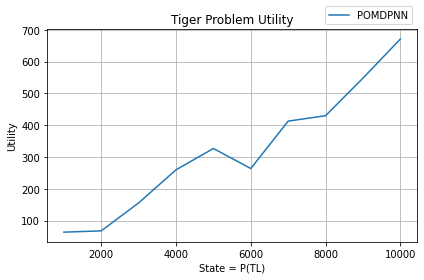

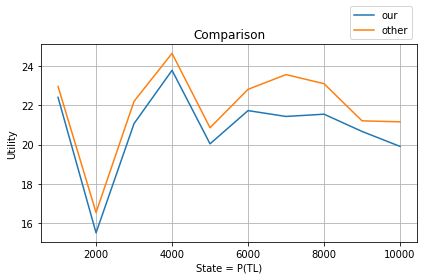

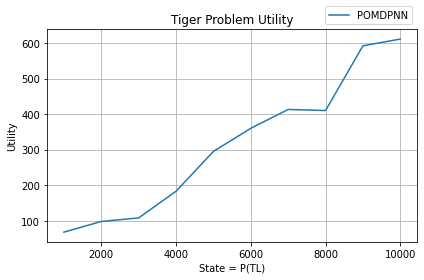

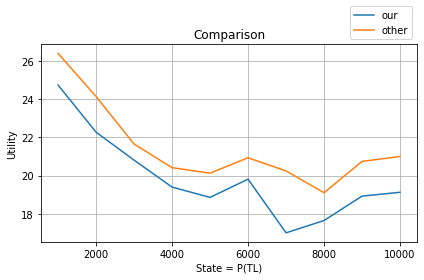

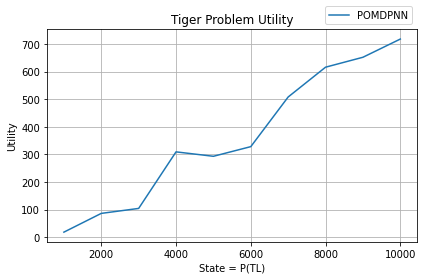

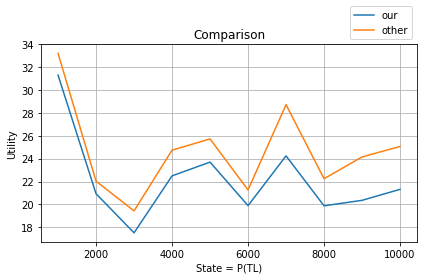

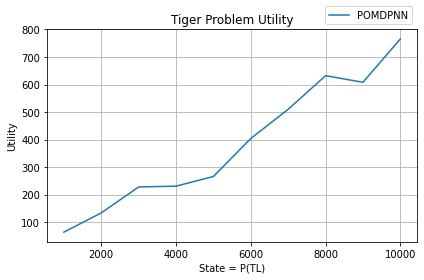

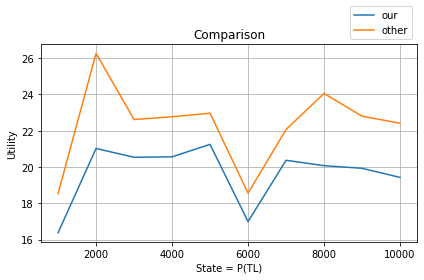

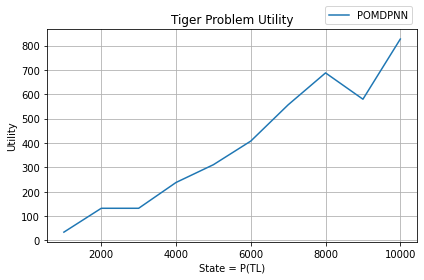

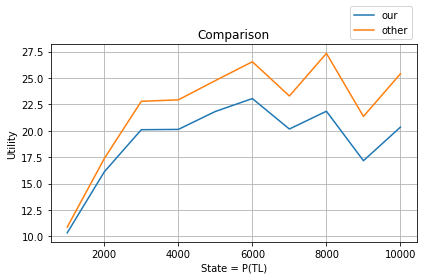

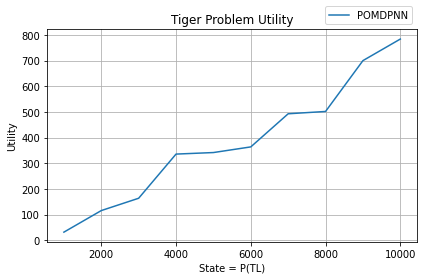

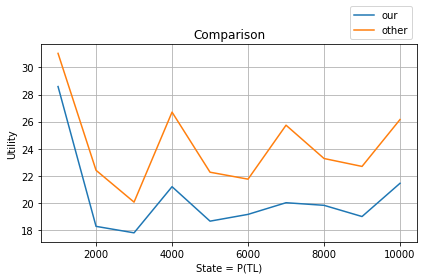

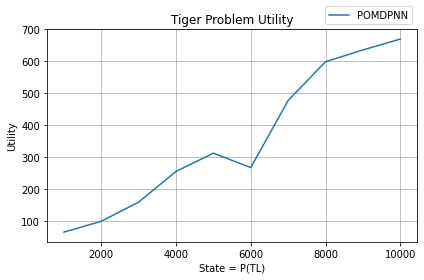

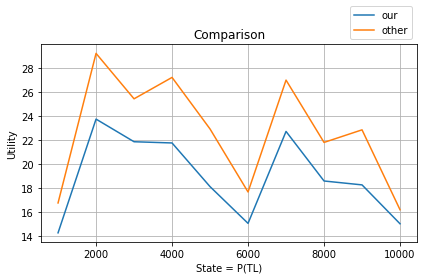

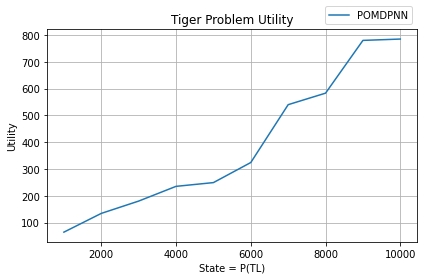

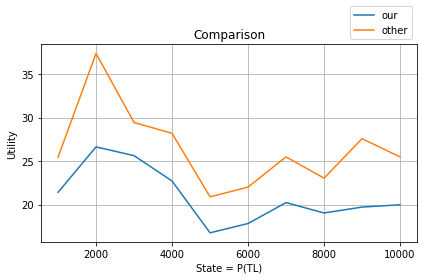

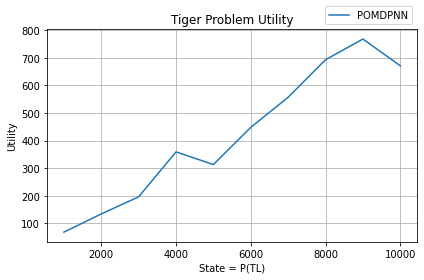

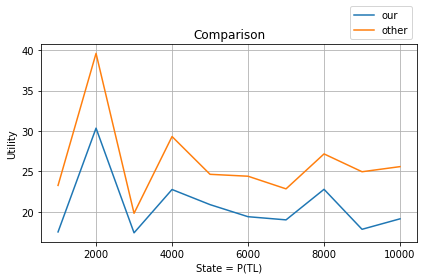

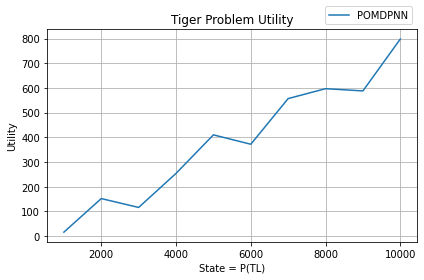

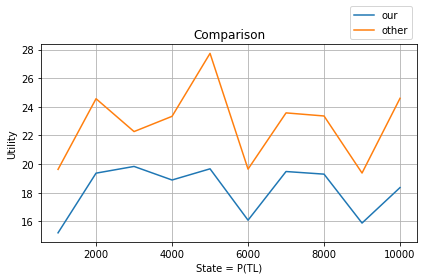

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
x = [[0.368, 0.2605, 0.24666666666666667, 0.1245, 0.0406, 0.056, 0.025714285714285714, 0.0225, 0.032, 0.0371], [0.405, 0.268, 0.17166666666666666, 0.181, 0.1694, 0.242, 0.137, 0.15725, 0.19922222222222222, 0.1438], [0.43, 0.239, 0.17433333333333334, 0.137, 0.1968, 0.198, 0.17814285714285713, 0.151125, 0.15411111111111112, 0.1746], [0.26, 0.3045, 0.48233333333333334, 0.42, 0.2236, 0.322, 0.17314285714285715, 0.118375, 0.2867777777777778, 0.0658], [0.309, 0.387, 0.397, 0.312, 0.19, 0.22, 0.20185714285714285, 0.269125, 0.22088888888888888, 0.3048], [0.369, 0.436, 0.3313333333333333, 0.19675, 0.2362, 0.184, 0.14385714285714285, 0.253, 0.315, 0.2667], [0.439, 0.275, 0.30566666666666664, 0.1485, 0.2804, 0.232, 0.1452857142857143, 0.26225, 0.30733333333333335, 0.1481], [0.346, 0.345, 0.28933333333333333, 0.30175, 0.2008, 0.23, 0.21242857142857144, 0.2395, 0.19533333333333333, 0.2789], [0.571, 0.364, 0.4603333333333333, 0.35175, 0.278, 0.398, 0.24142857142857144, 0.26075, 0.24888888888888888, 0.2284], [0.367, 0.4705, 0.377, 0.31075, 0.4552, 0.358, 0.4607142857142857, 0.27275, 0.372, 0.3479]]
y = [[0.018851708397063533, 0.009251574997734243, 0.0061927370758460935, 0.004593874984535979, 0.003694461292000895, 0.002978912635218032, 0.0026600451934976474, 0.0023499317882475744, 0.0020875227038197764, 0.0019114162166594547], [0.017696951938051417, 0.009028148691335681, 0.006219790473816006, 0.004661433378200822, 0.003824479107373581, 0.0029641681708768696, 0.0026690105041391825, 0.0023032520895391135, 0.0020655055219887517, 0.001888941596602444], [0.019805483096951147, 0.009022164382238898, 0.006280456032574756, 0.004413688208839448, 0.003673796452959302, 0.003014991401118575, 0.002605883000723314, 0.002307544937065345, 0.002020013215558214, 0.0019013673954963], [0.016964144804347953, 0.009172304244646422, 0.006232114114906288, 0.004681888816080851, 0.003797374267853105, 0.0030777183457230037, 0.002682164132870204, 0.0023404816741936256, 0.0019921259915822703, 0.0018938972234320336], [0.017664983437279073, 0.009096579423506524, 0.00646631663404348, 0.004710768058974599, 0.003715073162252296, 0.0030716579622429184, 0.0026521652112513157, 0.0023342529512742983, 0.0020753684632344115, 0.001886842549361584], [0.018995506129845192, 0.009340408459684233, 0.006316667695039506, 0.004595144289333488, 0.0035745068522073124, 0.0031189301635327032, 0.002706389846627425, 0.002332195599777355, 0.0020202308258398687, 0.0018930194219156063], [0.017823473348584383, 0.009423826790333819, 0.006238041589316271, 0.004668179324172419, 0.0037612982115918995, 0.0030971297878405785, 0.0026671654557875644, 0.002367657837528723, 0.0020132104650102405, 0.001876153798174574], [0.017499580572101794, 0.009646454177287597, 0.006083360485538983, 0.004539764175537815, 0.003753734371936445, 0.003110725145637279, 0.0026095104791700077, 0.0023665579956001874, 0.0020862842806034947, 0.0019020018827598957], [0.019172801033321748, 0.008803293665915788, 0.006146057014350508, 0.004658398595399823, 0.003840788116893404, 0.0030691699604050234, 0.002672473649697312, 0.0022961832290894755, 0.002091617742949129, 0.001854065813094012], [0.018888472027015393, 0.008656720942953099, 0.0064274231058455405, 0.004657082858546024, 0.0036811725350969168, 0.003075118411468924, 0.002717067301868352, 0.0023010657469844436, 0.0021084016507666972, 0.0018718587515207986]]
z = [[0.018883177243900064, 0.009255041075584015, 0.006193905184720856, 0.004594590025473715, 0.0036945664762545265, 0.002979096055371474, 0.0026600984162388265, 0.002349989442799052, 0.0020876302611693843, 0.0019114949226587516], [0.017758941433622777, 0.009034038164385895, 0.006221527187556813, 0.0046628192048497035, 0.003825478242780143, 0.0029648782693433647, 0.0026695075062178352, 0.0023034355188226406, 0.0020658433547689832, 0.0018890814560603992], [0.019899887304336287, 0.009036909037866614, 0.006281829681936296, 0.0044145966591766185, 0.0036742829157005957, 0.003016154415662348, 0.0026061339141343377, 0.0023079459380874645, 0.002020280177772655, 0.0019015840834219343], [0.017011905395760203, 0.009178630506306101, 0.006244960250288136, 0.004686920098180869, 0.00379945033733214, 0.0030787278713406956, 0.0026829718374679562, 0.0023409157860221903, 0.001993225652458796, 0.0018941444818584578], [0.017708705279810756, 0.009107945196494762, 0.006472013263093457, 0.004712420952479241, 0.0037170433156685796, 0.0030728265620314148, 0.0026533895170973085, 0.002335173117833377, 0.0020762623263687638, 0.0018878317976350819], [0.019040376507571854, 0.009361749246661586, 0.006323570516340253, 0.004597828119583008, 0.0035765188045316734, 0.0031200073858605334, 0.0027072328742601993, 0.002333422039262728, 0.00202197276441762, 0.0018936129165116843], [0.01786285005088055, 0.009434782619443652, 0.006249894252695263, 0.004671268254379595, 0.003766143967159465, 0.003100046184578161, 0.0026682281679362915, 0.0023685346426890984, 0.0020137566960920943, 0.0018770129263410815], [0.017592413230994714, 0.009666420485743225, 0.00609546021387861, 0.004541989374531156, 0.0037552269416862606, 0.00311364901877074, 0.0026102822652467822, 0.0023678236199624076, 0.0020872914354717795, 0.0019029852601455688], [0.01933725070338942, 0.008830740343514656, 0.006162493328418492, 0.0046636669597644315, 0.0038432794864304, 0.003074789592462059, 0.002674161547022338, 0.002297260650977314, 0.002092188895851098, 0.001855484614137918], [0.018953859187725474, 0.008677054924792442, 0.006433464931706457, 0.004660824761126903, 0.0036871253684114523, 0.00307836165653081, 0.0027233089992153804, 0.0023024632317395198, 0.0021100119656172257, 0.001873717903043999]]
per_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cnt_lst = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
fig = 9
# for per in range(len(per_lst)):
#     plt.plot(cnt_lst, new_cnt[per], label='POMDPNN')
#     plt.legend(bbox_to_anchor=(1, 1), loc=4, ncol=1)
#     plt.title('Tiger Problem Utility')
#     plt.xlabel('State = P(TL)')
#     plt.ylabel('Utility')
#     plt.tight_layout()
#     plt.grid(True)
#     fig += 1
#     # plt.savefig(f'{fig}.pdf')
#     # plt.savefig(f'{fig}.svg')
#     # plt.savefig(f'{fig}.png')
#     plt.show()
#     plt.clf()
#     plt.plot(cnt_lst, our_mxv[per], label='our')
#     plt.plot(cnt_lst, oth_mxv[per], label='other')
#     plt.legend(bbox_to_anchor=(1, 1), loc=4, ncol=1)
#     plt.title('Comparison')
#     plt.xlabel('State = P(TL)')
#     plt.ylabel('Utility')
#     plt.tight_layout()
#     plt.grid(True)
#     fig += 1
#     # plt.savefig(f'{fig}.pdf')
#     # plt.savefig(f'{fig}.svg')
#     # plt.savefig(f'{fig}.png')
#     plt.show()
#     plt.clf()
for cnt in range(len(cnt_lst)):
    plt.plot(per_lst, new_cnt[:][cnt], label='POMDPNN')
    plt.legend(bbox_to_anchor=(1, 1), loc=4, ncol=1)
    plt.title('per list')
    plt.xlabel('State = P(TL)')
    plt.ylabel('Utility')
    plt.tight_layout()
    plt.grid(True)
    fig += 1
    # plt.savefig(f'{fig}.pdf')
    # plt.savefig(f'{fig}.svg')
    # plt.savefig(f'{fig}.png')
    plt.show()
    plt.clf()
    plt.plot(per_lst, our_mxv[:][cnt], label='our')
    plt.plot(per_lst, oth_mxv[:][cnt], label='other')
    plt.legend(bbox_to_anchor=(1, 1), loc=4, ncol=1)
    plt.title('Tiger Problem Utility')
    plt.xlabel('State = P(TL)')
    plt.ylabel('Utility')
    plt.tight_layout()
    plt.grid(True)
    fig += 1
    # plt.savefig(f'{fig}.pdf')
    # plt.savefig(f'{fig}.svg')
    # plt.savefig(f'{fig}.png')
    plt.show()
    plt.clf()
